In [1]:
from pyspark.sql import SparkSession
import numpy as np
import pandas as pd
from pyspark.sql.functions import *
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from pyspark.sql.types import *
import regex

In [2]:
spark = SparkSession.builder.getOrCreate()
spark

1. Narysuj wykres zależności kolumn Plot Infant mortality vs. Literacy dla 30 najbogatszych i 30 najbiedniejszych krajów

In [3]:
df_pandas = pd.read_csv('countries of the world.csv', sep=',', decimal=',')

# '   China ' ----> 'China' 
df_pandas['Country'] =df_pandas['Country'].apply(lambda x: " ".join(x.split()))
df_pandas['Region'] =df_pandas['Region'].apply(lambda x: " ".join(x.split()))

df_pandas.to_csv('countries_of_the_world.csv', sep=',', decimal='.') 
countries = spark.read.csv('countries_of_the_world.csv',header=True,inferSchema=True)



In [4]:
countries.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Population: integer (nullable = true)
 |-- Area (sq km): integer (nullable = true)
 |-- Pop Density (per sq km): double (nullable = true)
 |-- Coastline (coast/area ratio): double (nullable = true)
 |-- Net migration: double (nullable = true)
 |-- Infant mortality (per 1000 births): double (nullable = true)
 |-- GDP ($ per capita): double (nullable = true)
 |-- Literacy (%): double (nullable = true)
 |-- Phones (per 1000): double (nullable = true)
 |-- Arable (%): double (nullable = true)
 |-- Crops (%): double (nullable = true)
 |-- Other (%): double (nullable = true)
 |-- Climate: double (nullable = true)
 |-- Birthrate: double (nullable = true)
 |-- Deathrate: double (nullable = true)
 |-- Agriculture: double (nullable = true)
 |-- Industry: double (nullable = true)
 |-- Service: double (nullable = true)



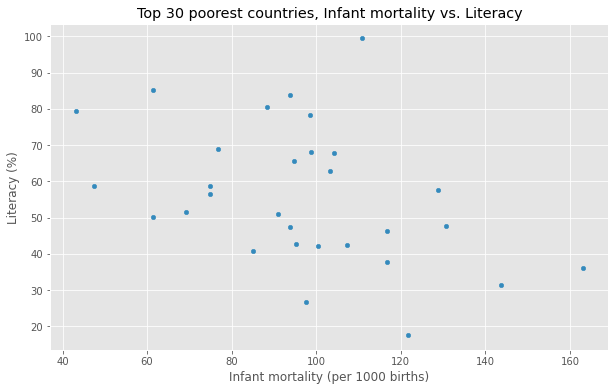

In [5]:

df = (countries.select('Country','GDP ($ per capita)','Infant mortality (per 1000 births)','Literacy (%)')
      .orderBy(asc("GDP ($ per capita)"))
      .na.drop()
      .limit(30)
      .toPandas()
)


df.plot(x="Infant mortality (per 1000 births)",y="Literacy (%)",kind="scatter",figsize=(10, 6),title='Top 30 poorest countries, Infant mortality vs. Literacy')
plt.show()



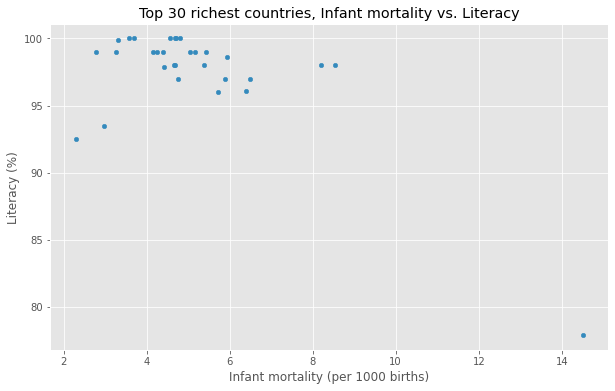

In [6]:
df = (countries.select('Country','GDP ($ per capita)','Infant mortality (per 1000 births)','Literacy (%)')
      .orderBy(desc("GDP ($ per capita)"))
      .na.drop()
      .limit(30)
      .toPandas()
)

df.plot(x="Infant mortality (per 1000 births)",y="Literacy (%)",kind="scatter",figsize=(10, 6),title='Top 30 richest countries, Infant mortality vs. Literacy')
plt.show()

2. Wczytaj zbiór danych "airports.csv" ze strony https://www.kaggle.com/jonatancr/airports (zawiera on dane na temat lotnisk z całego świata). Ponieważ w zbiorze tym nie ma nagłówka, nadaj własne nazwy kolumnom, korzystając z opisu pliku na stronie https://openflights.org/data.html. Narysuj na wykresie (mapie) położenia wszystkich/wybranych lotnisk.

In [7]:
file_path = 'airports.csv'
header = ['Airport ID','Name','City','Country','IATA','ICAO','Latitude','Longitude','Altitude','Timezone','DST','Tz database time zone','Type','Source']

schema = (StructType() \
      .add("Airport ID",StringType(),True) 
      .add("Name",StringType(),True) 
      .add("City",StringType(),True) 
      .add("Country",StringType(),True) 
      .add("IATA",StringType(),True) 
      .add("ICAO",StringType(),True) 
      .add("Latitude",DoubleType(),True) 
      .add("Longitude",DoubleType(),True) 
      .add("Altitude",DoubleType(),True) 
      .add("Timezone",IntegerType(),True) 
      .add("DST",StringType(),True) 
      .add("Tz database time zone",StringType(),True) 
      .add("Type",StringType(),True) 
      .add("Source",StringType(),True)
)


airports =spark.read.format("csv") \
      .option("header", False) \
      .schema(schema) \
      .load("airports.csv")

print(countries.dtypes)

airports.toPandas()



[('_c0', 'int'), ('Country', 'string'), ('Region', 'string'), ('Population', 'int'), ('Area (sq km)', 'int'), ('Pop Density (per sq km)', 'double'), ('Coastline (coast/area ratio)', 'double'), ('Net migration', 'double'), ('Infant mortality (per 1000 births)', 'double'), ('GDP ($ per capita)', 'double'), ('Literacy (%)', 'double'), ('Phones (per 1000)', 'double'), ('Arable (%)', 'double'), ('Crops (%)', 'double'), ('Other (%)', 'double'), ('Climate', 'double'), ('Birthrate', 'double'), ('Deathrate', 'double'), ('Agriculture', 'double'), ('Industry', 'double'), ('Service', 'double')]


,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282.0,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20.0,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388.0,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239.0,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146.0,10.0,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7179,12053,Rugao Air Base,Rugao,China,RUG,ZSRG,32.257885,120.501656,0.0,NaN,\N,\N,airport,OurAirports
7180,12054,Wuhu Air Base,Wuhu,China,WHU,ZSWU,31.390600,118.408997,0.0,NaN,\N,\N,airport,OurAirports
7181,12055,Shanshan Airport,Shanshan,China,SXJ,ZWSS,42.911701,90.247498,0.0,NaN,\N,\N,airport,OurAirports
7182,12056,Yingkou Lanqi Airport,Yingkou,China,YKH,ZYYK,40.542524,122.358600,0.0,NaN,\N,\N,airport,OurAirports


<AxesSubplot:title={'center':'ff'}, xlabel='Longitude', ylabel='Latitude'>

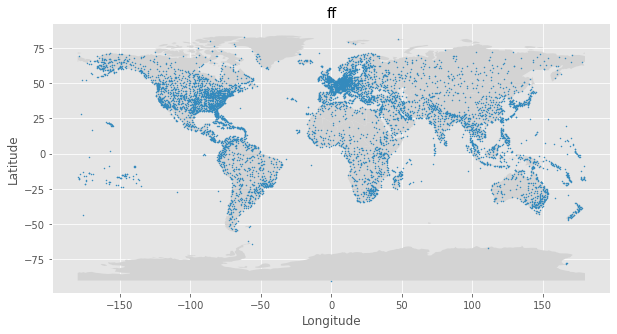

In [8]:
import geopandas as gpd
fig, ax = plt.subplots(figsize=(10,6))

df = airports.toPandas()

countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey",ax=ax)

df.plot(x="Longitude", y="Latitude", kind="scatter", 
        title=f"ff", 
        s=1.0,
        ax=ax)



3. Utwórz dwie nowe kolumny w ramce "Countries", w których powierzchnia i gęstość zaludnienia wyrażone sa odpowiednio w milach kwadratowych i osobach na milę kwadratową

* Nazwy nowych kolumn proszę ustawić odpowiednio na 'Area (sq mi)' oraz 'Pop Density (per sq mi)'

* Uwaga: Typami nowych kolumn mają być odpowiednio integer (powierzchnia) i float (gęstość). Zaokrąglanie do integer: "int(x)"


In [9]:
countries = spark.read.csv('countries_of_the_world.csv',header=True,inferSchema=True)

area_udf = udf(lambda x: int(x*0.386102) , IntegerType())

countries = countries.withColumn("Area (sq mi)", area_udf('Area (sq km)'))

density_udf = udf(lambda x: float(x/0.386102) , DoubleType())
countries = countries.withColumn("Pop Density (per sq mi)", density_udf('Pop Density (per sq km)'))




4. Na wykresie scatterplot narysuj zależność liczby lotnisk od powierzchni kraju.
* Dane potrzebne do wykresu są w dwóch ramkach (Countries i Airports), konieczne więc będzie ich złączenie (join).
* Nie zawsze nazwy tych samych krajów będą identyczne w obu ramkach, co może stanowić problem (złączenie nie powstanie). Zastanów się jak przy pomocy mechanizmu złączeń wykryć, które nazwy się różnią. Stwórz odpowiednią ramkę, która zawiera takie nazwy.
* Następnie zmień nazwy kilku największych państw w jednej z ramek, tak żeby ujednolicić nazwy. Można to zrobić funkcją replace.

In [10]:
countries.createOrReplaceTempView("countries")
airports.createOrReplaceTempView("airports")
query = "select distinct c.Country as countriesCountry from countries as c full outer join airports as a on a.Country = c.Country where c.Country is null or a.Country is null order by countriesCountry"

df = spark.sql(query).toPandas()

query = "select distinct a.Country as airportsCountry from airports as a full outer join countries as c on a.Country = c.Country where c.Country is null or a.Country is null order by airportsCountry"

df1 = spark.sql(query).toPandas()
df2 =pd.concat([df, df1], axis=1) 

df2




,countriesCountry,airportsCountry
0,None,None
1,Andorra,Antarctica
2,Antigua & Barbuda,Antigua and Barbuda
3,"Bahamas, The",Bahamas
4,Bosnia & Herzegovina,Bosnia and Herzegovina
5,British Virgin Is.,British Indian Ocean Territory
6,Central African Rep.,British Virgin Islands
7,"Congo, Dem. Rep.",Central African Republic
8,"Congo, Repub. of the",Christmas Island
9,"Gambia, The",Cocos (Keeling) Islands


In [11]:
mapping = {
    'Korea, North' : 'North Korea',
    'Korea, South' : 'South Korea',
    'Antigua & Barbuda' : 'Antigua and Barbuda',
    'Bosnia & Herzegovina' : 'Bosnia and Herzegovina',
    'Turks & Caicos Is' : 'Turks and Caicos Islands',
    
}

# print(mapping)
for a, b in mapping.items():
    countries = countries.replace(a,b,subset=['Country'])


In [12]:
df = (countries.join(airports, "Country")
      
      .groupBy('Country')
      .agg(count("Country").alias("sum_airports"))
      .orderBy('sum_airports',ascending=False)
      .toPandas()
 )




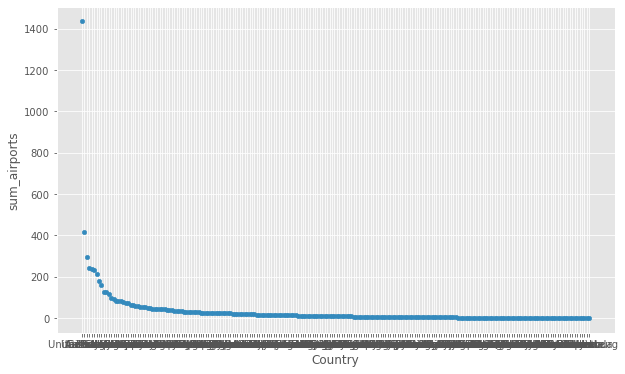

In [13]:
df.plot(x="Country",y="sum_airports",kind="scatter",figsize=(10,6))
plt.show()


5. Oblicz, ile lotnisk jest na poszczególnych kontynentach. To zadanie również wymaga złączenia ramek "Countries" i "Airports". Wynik przedstaw na wykresie słupkowym.
* Do ramki "Countries" dodaj nową kolumnę "Continent" (według klasyfikacji Africa, Asia, Europe, North America, South America, Antarctica, Australia/Oceania).
* Skorzystaj z kolumny "Region" i pomocniczej funkcji (UDF) mapującej region na kontynent.


In [14]:
query ="""
    SELECT distinct Region from countries
"""
# query ="select * from airports"
# query ="select * from countries"


df1 = spark.sql(query).toPandas()
df1

,Region
0,C.W. OF IND. STATES
1,EASTERN EUROPE
2,NORTHERN AMERICA
3,ASIA (EX. NEAR EAST)
4,OCEANIA
5,WESTERN EUROPE
6,NEAR EAST
7,SUB-SAHARAN AFRICA
8,BALTICS
9,LATIN AMER. & CARIB


In [15]:

mapping = {
    'BALTICS' : 'Europe',
    'C.W. OF IND. STATES' : 'Asia',
    'ASIA (EX. NEAR EAST)' : 'Asia',
    'WESTERN EUROPE' : 'Europe',
    'NORTHERN AMERICA' : 'North America',
    'NEAR EAST' : 'Asia',
    'EASTERN EUROPE' : 'Europe',
    'OCEANIA' : 'Australia/Oceania',
    'SUB-SAHARAN AFRICA' : 'Africa',
    'NORTHERN AFRICA' : 'Africa',
    'LATIN AMER. & CARIB' : 'South America',
}

def continent(x):
    try:
        return mapping[x]
    except KeyError:
        return f"NotFound|"
    
my_udf = udf(continent , StringType())
countries = countries.withColumn("Continent", my_udf('Region'))



# countries.toPandas()
# df1['countries'] = df['cCountry']
# df2.toPandas()
df =countries.toPandas()

In [16]:
df[df['Continent'] == 'NotFound']

,_c0,Country,Region,Population,Area (sq km),Pop Density (per sq km),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Area (sq mi),Pop Density (per sq mi),Continent


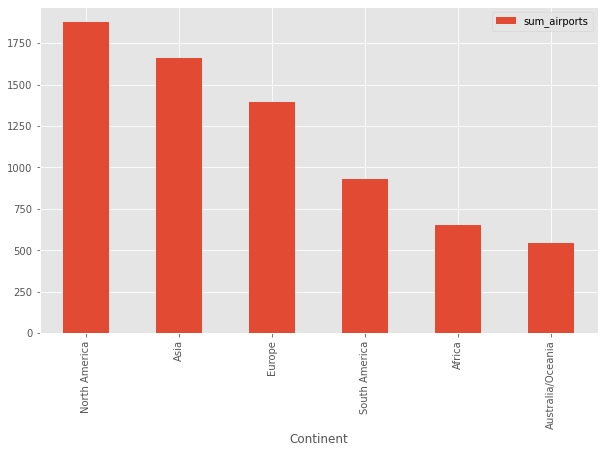

In [17]:
df = (countries.join(airports, "Country")
      .groupBy('Continent')
      .agg(count("Continent").alias("sum_airports"))
      .orderBy('sum_airports',ascending=False)
      .toPandas()
)

df.plot(x="Continent",y="sum_airports",kind="bar",figsize=(10,6))
plt.show()